# A) Scrapping Data

In [1]:
!pip install google-play-scraper # Corrected package name to google-play-scraper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.6 MB/s eta 0:00:00


In [2]:
from google_play_scraper import app
import pandas as pd
import numpy as np
from google.colab import files

In [3]:
#scrape jumlah ulasan yang diinginkan
from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'com.gojek.app',
    lang='id', #scrape data ulasan gojek app yang ada di google play store
    country='id', #setting bahasa menjadi bindo
    sort=Sort.MOST_RELEVANT, #gunakan most_relevan untuk mendapatkan ulasan yang relevant
    count=1000, #jumlah ulasan yang diambil ada seribu
    filter_score_with=None #di filter_score gunakan none untuk mengambil semua score atau rating bintang 1 sampai 5
)

In [4]:
#pengambilan kolom review
df_busu = pd.DataFrame(np.array(result),columns=['review'])

df_busu = df_busu.join(pd.DataFrame(df_busu.pop('review').tolist()))

df_busu.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,fbe5a86f-70b8-4460-b85c-cbccceed883e,Chairunnisa Hasibuan,https://play-lh.googleusercontent.com/a-/ALV-U...,Kecewe dengan sistem go food. TIDAK BISA CANCE...,1,24,5.1.2,2024-11-24 13:44:33,"Hai Kak Chairunnisa, mohon maaf atas ketidakny...",2024-11-24 15:15:46,5.1.2
1,1f21c550-da6b-4f08-b32e-c31874ab964d,Resha Siswanti,https://play-lh.googleusercontent.com/a-/ALV-U...,Gojek udah ga kayak dlu. Skrg ongkirnya mahal....,1,228,4.96.2,2024-10-17 14:38:41,"Mohon maaf atas ketidaknyamanannya, Kak Resha....",2024-10-17 15:26:33,4.96.2
2,c4f49de5-ac3c-4839-9748-0a21598f8ce4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Tolong dong kasi otomatis batalkan pesanan gof...,1,65,5.1.1,2024-11-14 15:55:51,"Hai Kak, mohon maaf atas ketidaknyamanannya. K...",2024-11-14 16:26:27,5.1.1
3,0fd2ea4a-a294-4a93-b476-7b760cc02cb3,Mochamad Hipni,https://play-lh.googleusercontent.com/a-/ALV-U...,"Kalau ada yang mudah kenapa di persulit, kalau...",3,8,5.1.2,2024-11-24 13:39:07,"Hai Kak Hipni, mohon maaf atas ketidaknyamanan...",2024-11-24 15:09:45,5.1.2
4,23d86120-220e-467c-b1fd-aeb042bed91f,Eka Suciati,https://play-lh.googleusercontent.com/a-/ALV-U...,"Tolong banget nih ya, kenapa sih ga dikasih at...",1,8,5.1.2,2024-11-25 00:43:38,"Hai Kak Eka, mohon maaf atas ketidaknyamananny...",2024-11-25 01:05:04,5.1.2


In [5]:
len(df_busu.index) #hitung kembali brp jumlah data yang didapat

1000

In [6]:
df_busu[['userName', 'at', 'content', 'score']].head()

,userName,at,content,score
0,Chairunnisa Hasibuan,2024-11-24 13:44:33,Kecewe dengan sistem go food. TIDAK BISA CANCE...,1
1,Resha Siswanti,2024-10-17 14:38:41,Gojek udah ga kayak dlu. Skrg ongkirnya mahal....,1
2,Pengguna Google,2024-11-14 15:55:51,Tolong dong kasi otomatis batalkan pesanan gof...,1
3,Mochamad Hipni,2024-11-24 13:39:07,"Kalau ada yang mudah kenapa di persulit, kalau...",3
4,Eka Suciati,2024-11-25 00:43:38,"Tolong banget nih ya, kenapa sih ga dikasih at...",1


In [7]:
#urutkan data berdasarkan tanggal
new_df = df_busu[['userName', 'at', 'content', 'score']]
sorted_df = new_df.sort_values(by='at', ascending=False) #diurutkan dari terbaru (true kalo urutkan dari terlama)
sorted_df.head()

,userName,at,content,score
341,21.038 Rifky Aditya Harmansyah,2024-11-25 17:16:14,"Tidak ada fitur pembatalan pesanan, sya menung...",1
7,FRAGIL IBNU SIDIQ,2024-11-25 17:02:42,GoFood selalu menjadi pilihan saya karena prom...,2
325,Mrzsaif,2024-11-25 16:43:31,Kasih bintang 1 dulu soalnya udah 1jam order t...,1
292,Evi Ningsih,2024-11-25 13:53:09,guys jng sekali kali pake go pinjam ya aq ada ...,1
609,Rosales Kevin Hilarius,2024-11-25 12:59:18,Tolong kalo bisa ongkir termasuk biaya minimal...,2


In [8]:
my_df = sorted_df[['userName', 'at', 'content', 'score']] #setelah mendapatkan sun, tgl, ulasan, score  kemudian dapat disimpan ke variable my_df

In [9]:
my_df.head()

,userName,at,content,score
341,21.038 Rifky Aditya Harmansyah,2024-11-25 17:16:14,"Tidak ada fitur pembatalan pesanan, sya menung...",1
7,FRAGIL IBNU SIDIQ,2024-11-25 17:02:42,GoFood selalu menjadi pilihan saya karena prom...,2
325,Mrzsaif,2024-11-25 16:43:31,Kasih bintang 1 dulu soalnya udah 1jam order t...,1
292,Evi Ningsih,2024-11-25 13:53:09,guys jng sekali kali pake go pinjam ya aq ada ...,1
609,Rosales Kevin Hilarius,2024-11-25 12:59:18,Tolong kalo bisa ongkir termasuk biaya minimal...,2


In [10]:
# Export the file to CSV
df_busu.to_csv('ulasangojek.csv', index=False)

# Download the file directly
files.download('ulasangojek.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# B) Sentiment Analysis

# **1) Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

%matplotlib inline

In [ ]:
# Install sastrawi untuk library bahasa Indonesia
!pip -q install sastrawi

In [ ]:
# Install untuk melakukan filter stopwords (kata-kata yang kurang penting)
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# **2) Data Acquisition**

In [ ]:
data = pd.read_csv('/content/ulasangojek.csv')
data

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,05cc05eb-a938-4d2d-96e4-4de49ff5ea66,denia ratna,https://play-lh.googleusercontent.com/a/ACg8oc...,Driver tolol. Tolong ditegur dan diedukasi. Ma...,1,10,5.1.1,2024-11-23 02:20:23,"Mohon maaf atas kendalanya, Kak Denia. Kesulit...",2024-11-23 04:32:33,5.1.1
1,fbe5a86f-70b8-4460-b85c-cbccceed883e,Chairunnisa Hasibuan,https://play-lh.googleusercontent.com/a-/ALV-U...,Kecewe dengan sistem go food. TIDAK BISA CANCE...,1,5,5.1.2,2024-11-24 13:44:33,"Hai Kak Chairunnisa, mohon maaf atas ketidakny...",2024-11-24 15:15:46,5.1.2
2,1f21c550-da6b-4f08-b32e-c31874ab964d,Resha Siswanti,https://play-lh.googleusercontent.com/a-/ALV-U...,Gojek udah ga kayak dlu. Skrg ongkirnya mahal....,1,216,4.96.2,2024-10-17 14:38:41,"Mohon maaf atas ketidaknyamanannya, Kak Resha....",2024-10-17 15:26:33,4.96.2
3,c4f49de5-ac3c-4839-9748-0a21598f8ce4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Tolong dong kasi otomatis batalkan pesanan gof...,1,51,5.1.1,2024-11-14 15:55:51,"Hai Kak, mohon maaf atas ketidaknyamanannya. K...",2024-11-14 16:26:27,5.1.1
4,0fd2ea4a-a294-4a93-b476-7b760cc02cb3,Mochamad Hipni,https://play-lh.googleusercontent.com/a-/ALV-U...,"Kalau ada yang mudah kenapa di persulit, kalau...",3,3,5.1.2,2024-11-24 13:39:07,"Hai Kak Hipni, mohon maaf atas ketidaknyamanan...",2024-11-24 15:09:45,5.1.2
...,...,...,...,...,...,...,...,...,...,...,...
995,08a07b56-81ec-47e0-91bb-42aff326b98a,Muhammad Alfaro,https://play-lh.googleusercontent.com/a-/ALV-U...,Saran untuk daerah Tabalong kalimantan selatan...,5,0,4.96.2,2024-10-04 12:01:23,NaN,NaN,4.96.2
996,8fec33f7-2ee1-439f-afec-9b6cf45f9082,Evita Sari,https://play-lh.googleusercontent.com/a/ACg8oc...,"Terimakasih banyak Gojek, benar-benar membantu...",5,30,4.94.1,2024-09-08 12:14:17,NaN,NaN,4.94.1
997,92ce02f3-a790-4eaa-a196-6b9b4e38221b,Nunuwnana,https://play-lh.googleusercontent.com/a-/ALV-U...,Sangat membantu bagi pengguna. Semoga kesejaht...,5,41,4.94.2,2024-09-25 05:57:36,NaN,NaN,4.94.2
998,7db4a622-8ae2-4cad-9633-33bc31b4e788,Maria Yuni,https://play-lh.googleusercontent.com/a-/ALV-U...,gila biaya layanan mahal banget beda sama apk ...,1,0,4.94.2,2024-09-26 08:55:49,"Mohon maaf atas ketidaknyamanannya, Kak Maria....",2024-09-26 09:02:38,4.94.2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              1000 non-null   object
 1   userName              1000 non-null   object
 2   userImage             1000 non-null   object
 3   content               1000 non-null   object
 4   score                 1000 non-null   int64 
 5   thumbsUpCount         1000 non-null   int64 
 6   reviewCreatedVersion  1000 non-null   object
 7   at                    1000 non-null   object
 8   replyContent          723 non-null    object
 9   repliedAt             723 non-null    object
 10  appVersion            1000 non-null   object
 11  sentimen              1000 non-null   object
dtypes: int64(2), object(10)
memory usage: 93.9+ KB


In [ ]:
data.isnull().sum().sum()

554

In [ ]:
data.dropna()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sentimen
0,05cc05eb-a938-4d2d-96e4-4de49ff5ea66,denia ratna,https://play-lh.googleusercontent.com/a/ACg8oc...,Driver tolol. Tolong ditegur dan diedukasi. Ma...,1,10,5.1.1,2024-11-23 02:20:23,"Mohon maaf atas kendalanya, Kak Denia. Kesulit...",2024-11-23 04:32:33,5.1.1,Negatif
1,fbe5a86f-70b8-4460-b85c-cbccceed883e,Chairunnisa Hasibuan,https://play-lh.googleusercontent.com/a-/ALV-U...,Kecewe dengan sistem go food. TIDAK BISA CANCE...,1,5,5.1.2,2024-11-24 13:44:33,"Hai Kak Chairunnisa, mohon maaf atas ketidakny...",2024-11-24 15:15:46,5.1.2,Negatif
2,1f21c550-da6b-4f08-b32e-c31874ab964d,Resha Siswanti,https://play-lh.googleusercontent.com/a-/ALV-U...,Gojek udah ga kayak dlu. Skrg ongkirnya mahal....,1,216,4.96.2,2024-10-17 14:38:41,"Mohon maaf atas ketidaknyamanannya, Kak Resha....",2024-10-17 15:26:33,4.96.2,Negatif
3,c4f49de5-ac3c-4839-9748-0a21598f8ce4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Tolong dong kasi otomatis batalkan pesanan gof...,1,51,5.1.1,2024-11-14 15:55:51,"Hai Kak, mohon maaf atas ketidaknyamanannya. K...",2024-11-14 16:26:27,5.1.1,Negatif
4,0fd2ea4a-a294-4a93-b476-7b760cc02cb3,Mochamad Hipni,https://play-lh.googleusercontent.com/a-/ALV-U...,"Kalau ada yang mudah kenapa di persulit, kalau...",3,3,5.1.2,2024-11-24 13:39:07,"Hai Kak Hipni, mohon maaf atas ketidaknyamanan...",2024-11-24 15:09:45,5.1.2,Netral
...,...,...,...,...,...,...,...,...,...,...,...,...
986,5157eac9-8470-4a42-a6c0-f247d062ee06,Muslihdinatha Muslihdinatha,https://play-lh.googleusercontent.com/a/ACg8oc...,Biar lebih nyaman sopir nya harus ramah dan sa...,3,0,5.1.2,2024-11-22 07:47:52,"Hai Kak Muslihdinatha, terima kasih atas ulasa...",2024-11-22 08:16:29,5.1.2,Netral
988,2e729a57-9a30-4b7d-a448-bfa678953fd4,Algan Khalaza,https://play-lh.googleusercontent.com/a-/ALV-U...,"Untuk layanan gofood nya mohon diperbaiki, ter...",2,43,4.92.1,2024-08-16 14:10:27,"Hai, Kak Algan. Pastikan kamu sudah memberikan...",2024-08-16 14:55:22,4.92.1,Negatif
990,60e69161-285b-419a-bf19-693d6917673d,Faizal Januar,https://play-lh.googleusercontent.com/a/ACg8oc...,Mau bayar tagihan malah suruh update mulu apli...,3,0,5.0.0,2024-10-30 10:13:23,"Hai Kak Faizal, mohon maaf atas ketidaknyamana...",2024-10-30 11:05:32,5.0.0,Netral
992,1bb96090-4d7f-487a-9d32-a3182a674171,Ladis Washerum,https://play-lh.googleusercontent.com/a-/ALV-U...,ini pertama kali saya pakai gojek tapi kenapa ...,3,1,5.1.1,2024-11-12 11:11:24,"Mohon maaf atas kendalanya, Kak Dimas. Saat re...",2024-11-12 12:03:55,5.1.1,Netral


In [ ]:
# Kelompokkan score menjadi sentiment
def assign_sentiment(score):
    if score in [1, 2]:
        return 'Negatif'
    elif score == 3:
        return 'Netral'
    elif score in [4, 5]:
        return 'Positif'

In [ ]:
# Tambahkan kolom baru di data berdasarkan fungsi sentiment
data['sentimen'] = data['score'].apply(assign_sentiment)

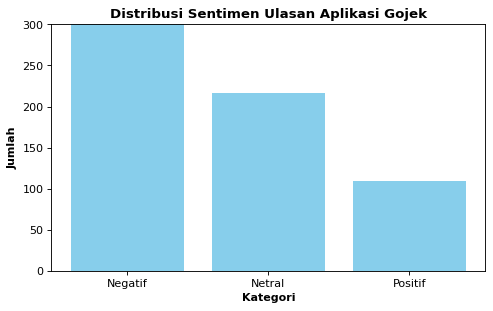

In [ ]:
height = data['sentimen'].value_counts()
labels = ('Negatif', 'Netral', 'Positif')

x_pos = np.arange(len(labels))
y_pos = np.arange(len(labels))

plt.figure(figsize=(7, 4), dpi=80)
plt.ylim(0,300)
plt.title('Distribusi Sentimen Ulasan Aplikasi Gojek', fontweight='bold')
plt.xlabel('Kategori', fontweight='bold')
plt.ylabel('Jumlah', fontweight='bold')
plt.bar(y_pos, height, color='skyblue')
plt.xticks(y_pos, labels)
plt.show()

# **3) Data Pre-processing**

## Case Folding

Proses untuk mengubah semua teks di dalam dataset menjadi huruf kecil agar data bisa jadi lebih konsisten.


In [ ]:
import re

In [ ]:
# Buat fungsi untuk langkah case folding
def casefolding(text):
    text = text.lower() # Mengubah teks jadi lower case
    text = re.sub(r'http\S+', '', text) # Menghapus URL
    text = re.sub(r'\d+', '', text) # Menghapus angka
    text = re.sub(r'[^\w\s]', '', text) # Menghapus karakter tanda baca
    text = text.strip() # Menghapus spasi di awal dan akhir teks
    return text

In [ ]:
raw_sample = data['content'].iloc[1]
case_folding = casefolding(raw_sample)

print(f'Raw: {raw_sample}')
print(f'Case folding: {case_folding}')

Raw: Kecewe dengan sistem go food. TIDAK BISA CANCEL dan TIDAK BISA KOMUNIKASI SAMA RESTO. Menunggu pesanan yang terlambat dan tidak jadi jadi, sangat mengganggu aktifitas. Tolong perbaiki sistem KONSEKUENSI WAKTU ke restonya, kalau telat ya siap di CANCEL, atau paling tidak KOMUNIKASI resto dan customernya dijalin. Kecewa
Case folding: kecewe dengan sistem go food tidak bisa cancel dan tidak bisa komunikasi sama resto menunggu pesanan yang terlambat dan tidak jadi jadi sangat mengganggu aktifitas tolong perbaiki sistem konsekuensi waktu ke restonya kalau telat ya siap di cancel atau paling tidak komunikasi resto dan customernya dijalin kecewa


## Normalization

Proses untuk memodifikasi nilai dalam variabel sehingga kita dapat mengukurnya dalam skala umum.

In [ ]:
# Kumpulan slangwords
!wget https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv

--2024-11-26 16:42:37--  https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80969 (79K) [text/plain]
Saving to: ‘key_norm.csv.4’

key_norm.csv.4      100%[===================>]  79.07K  --.-KB/s    in 0.02s   

2024-11-26 16:42:37 (3.44 MB/s) - ‘key_norm.csv.4’ saved [80969/80969]



In [ ]:
key_norm = pd.read_csv('/content/key_norm.csv')
print(key_norm.shape)
key_norm.head()

(3720, 3)


,_id,singkat,hasil
0,1,abis,habis
1,2,accent,tekanan
2,3,accept,terima
3,4,accident,kecelakaan
4,5,achievement,prestasi


In [ ]:
# Buat fungsi untuk langkah text normalization
def text_normalize(text):
    text = ' '.join([key_norm.loc[key_norm['singkat'] == word, 'hasil'].values[0] if (key_norm['singkat'] == word).any() else word for word in text.split()])
    text = str.lower(text)
    return text

In [ ]:
raw_sample = data['content'].iloc[11]
case_folding = casefolding(raw_sample)
text_normalization = text_normalize(case_folding)

print(f'Raw: {raw_sample}')
print(f'Case folding: {case_folding}')
print(f'Text normalization: {text_normalization}')

Raw: Mulai dari proses pemesanan sampai pengantaran luar biasa bagus.👍👍 Sebelumnya sy merasa ada hambatan terutama pada proses masuk aplikasi dan kecepatan layanan, membuat seringnya sy membatalkan pemesanan. Tapi sekarang berbeda, sangat cepat dan nyaman. Semoga ke depan lebih baik lagi atau minimal mempertahankan capaian sekarang. Tabé !🙏🙏
Case folding: mulai dari proses pemesanan sampai pengantaran luar biasa bagus sebelumnya sy merasa ada hambatan terutama pada proses masuk aplikasi dan kecepatan layanan membuat seringnya sy membatalkan pemesanan tapi sekarang berbeda sangat cepat dan nyaman semoga ke depan lebih baik lagi atau minimal mempertahankan capaian sekarang tabé
Text normalization: mulai dari proses pemesanan sampai pengantaran luar biasa bagus sebelumnya saya merasa ada hambatan terutama pada proses masuk aplikasi dan kecepatan layanan membuat seringnya saya membatalkan pemesanan tapi sekarang berbeda sangat cepat dan nyaman semoga ke depan lebih baik lagi atau minimal m

## Stopword Removal

Proses menghilangkan kata-kata umum yang sering muncul dan tidak memberikan informasi penting.

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

stopwords_ind = stopwords.words('indonesian')

In [ ]:
# Buat fungsi untuk langkah stopword removal
def stopword_removal(text):
    clean_words = []
    text = text.split()
    for word in text:
        if word not in stopwords_ind:
            clean_words.append(word)
    return " ".join(clean_words)
    return text

In [ ]:
raw_sample = data['content'].iloc[5]
case_folding = casefolding(raw_sample)
stopword_removal = stopword_removal(case_folding)

print(f'Kalimat asli: {raw_sample}')
print(f'Kalimat setelah stopword removal: {stopword_removal}')

Kalimat asli: Pilihan lokasi paling atas gofood bukan paling dekat jadinya terbeli di lokasi yg lebih jauh, tidak bisa cancel padahal belum 30 detik, tidak bisa hubungi resto supaya cancel dari resto Estimasi waktu payah, resto yg dekat dan jauh cuma beda 5 menit jadi tidak bisa sadar sebelumnya bahwa resto yg dipesan itu resto yg jauh, akhirnya waktu aktual selisih sampai 10 menit dari waktu terlama, beda dengan grab yg estimasi akurat jd klo jauh bisa sadar langsung klo beda cabang
Kalimat setelah stopword removal: pilihan lokasi gofood terbeli lokasi yg cancel detik hubungi resto cancel resto estimasi payah resto yg beda menit sadar resto yg dipesan resto yg aktual selisih menit terlama beda grab yg estimasi akurat jd klo sadar langsung klo beda cabang


## Stemming

Proses menghilangkan imbuhan baik yang berada di awal kata ataupun yang berada di akhir.

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
# Buat fungsi untuk langkah stemming bahasa Indonesia
def stemming(text):
    text = stemmer.stem(text)
    return text

In [ ]:
raw_sample = data['content'].iloc[8]
case_folding = casefolding(raw_sample)
normalize = text_normalize(case_folding)
stopword_removal = stopword_removal(normalize)
text_stemming = stemming(stopword_removal)

print(f'Kalimat asli: {raw_sample}')
print(f'Kalimat setelah case folding: {case_folding}')
print(f'Kalimat setelah text normalization: {normalize}')
print(f'Kalimat setelah stopword removal: {stopword_removal}')
print(f'Kalimat setelah stemming: {text_stemming}')

Kalimat asli: Tolong dong untuk gofood "pembatalan pesan" diperbaiki lagi kedepannya misal dikasih waktu 2-5 menit setidaknya. Karena ketika tidak sengaja untuk melakukan pembelian pesanan terus ingin membatalkan pesanan lagi sudah tidak bisa karena cepatnya proses waktu "pembatalan pesan" tersebut. Sebelumnya terimakasih dan mohon segera diperbaiki yaa
Kalimat setelah case folding: tolong dong untuk gofood pembatalan pesan diperbaiki lagi kedepannya misal dikasih waktu  menit setidaknya karena ketika tidak sengaja untuk melakukan pembelian pesanan terus ingin membatalkan pesanan lagi sudah tidak bisa karena cepatnya proses waktu pembatalan pesan tersebut sebelumnya terimakasih dan mohon segera diperbaiki yaa
Kalimat setelah text normalization: tolong dong untuk gofood pembatalan pesan diperbaiki lagi kedepannya misal dikasih waktu menit setidaknya karena ketika tidak sengaja untuk melakukan pembelian pesanan terus ingin membatalkan pesanan lagi sudah tidak bisa karena cepatnya proses 

## Text Preprocessing Pipeline

In [ ]:
# Buat fungsi untuk menggabungkan seluruh langkah data preprocessing
def text_preprocessing(text):
    text = casefolding(text)
    text = text_normalize(text)
    text = stopword_removal(text)
    text = stemming(text)
    return text

In [ ]:
%%time
data['clean_content'] = data['content'].apply(text_preprocessing)

CPU times: user 6min 43s, sys: 1.48 s, total: 6min 44s
Wall time: 6min 48s


In [ ]:
data

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sentimen,clean_content
0,05cc05eb-a938-4d2d-96e4-4de49ff5ea66,denia ratna,https://play-lh.googleusercontent.com/a/ACg8oc...,Driver tolol. Tolong ditegur dan diedukasi. Ma...,1,10,5.1.1,2024-11-23 02:20:23,"Mohon maaf atas kendalanya, Kak Denia. Kesulit...",2024-11-23 04:32:33,5.1.1,Negatif,driver tolol tolong tegur edukasi tarif urus c...
1,fbe5a86f-70b8-4460-b85c-cbccceed883e,Chairunnisa Hasibuan,https://play-lh.googleusercontent.com/a-/ALV-U...,Kecewe dengan sistem go food. TIDAK BISA CANCE...,1,5,5.1.2,2024-11-24 13:44:33,"Hai Kak Chairunnisa, mohon maaf atas ketidakny...",2024-11-24 15:15:46,5.1.2,Negatif,kecewe sistem go food cancel komunikasi resto ...
2,1f21c550-da6b-4f08-b32e-c31874ab964d,Resha Siswanti,https://play-lh.googleusercontent.com/a-/ALV-U...,Gojek udah ga kayak dlu. Skrg ongkirnya mahal....,1,216,4.96.2,2024-10-17 14:38:41,"Mohon maaf atas ketidaknyamanannya, Kak Resha....",2024-10-17 15:26:33,4.96.2,Negatif,gojek ongkirnya mahal ongkir gofood jarak ongk...
3,c4f49de5-ac3c-4839-9748-0a21598f8ce4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Tolong dong kasi otomatis batalkan pesanan gof...,1,51,5.1.1,2024-11-14 15:55:51,"Hai Kak, mohon maaf atas ketidaknyamanannya. K...",2024-11-14 16:26:27,5.1.1,Negatif,tolong kasih otomatis batal pesan gofood drive...
4,0fd2ea4a-a294-4a93-b476-7b760cc02cb3,Mochamad Hipni,https://play-lh.googleusercontent.com/a-/ALV-U...,"Kalau ada yang mudah kenapa di persulit, kalau...",3,3,5.1.2,2024-11-24 13:39:07,"Hai Kak Hipni, mohon maaf atas ketidaknyamanan...",2024-11-24 15:09:45,5.1.2,Netral,mudah sulit kasih kadang kadang pakai gojek ny...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,08a07b56-81ec-47e0-91bb-42aff326b98a,Muhammad Alfaro,https://play-lh.googleusercontent.com/a-/ALV-U...,Saran untuk daerah Tabalong kalimantan selatan...,5,0,4.96.2,2024-10-04 12:01:23,NaN,NaN,4.96.2,Positif,saran daerah tabalong kalimantan selatan drive...
996,8fec33f7-2ee1-439f-afec-9b6cf45f9082,Evita Sari,https://play-lh.googleusercontent.com/a/ACg8oc...,"Terimakasih banyak Gojek, benar-benar membantu...",5,30,4.94.1,2024-09-08 12:14:17,NaN,NaN,4.94.1,Positif,terimakasih gojek benarbenar bantu aplikasi tr...
997,92ce02f3-a790-4eaa-a196-6b9b4e38221b,Nunuwnana,https://play-lh.googleusercontent.com/a-/ALV-U...,Sangat membantu bagi pengguna. Semoga kesejaht...,5,41,4.94.2,2024-09-25 05:57:36,NaN,NaN,4.94.2,Positif,bantu guna moga sejahtera drivernya perhati pe...
998,7db4a622-8ae2-4cad-9633-33bc31b4e788,Maria Yuni,https://play-lh.googleusercontent.com/a-/ALV-U...,gila biaya layanan mahal banget beda sama apk ...,1,0,4.94.2,2024-09-26 08:55:49,"Mohon maaf atas ketidaknyamanannya, Kak Maria....",2024-09-26 09:02:38,4.94.2,Negatif,gila biaya layan mahal banget beda apk belah p...


# **4) Feature Engineering**

In [ ]:
# Pisahkan kolom sentimen dan clean data
x = data['clean_content']
y = data['sentimen']

In [ ]:
x

,clean_content
0,driver tolol tolong tegur edukasi tarif urus c...
1,kecewe sistem go food cancel komunikasi resto ...
2,gojek ongkirnya mahal ongkir gofood jarak ongk...
3,tolong kasih otomatis batal pesan gofood drive...
4,mudah sulit kasih kadang kadang pakai gojek ny...
...,...
995,saran daerah tabalong kalimantan selatan drive...
996,terimakasih gojek benarbenar bantu aplikasi tr...
997,bantu guna moga sejahtera drivernya perhati pe...
998,gila biaya layan mahal banget beda apk belah p...


In [ ]:
y

,sentimen
0,Negatif
1,Negatif
2,Negatif
3,Negatif
4,Netral
...,...
995,Positif
996,Positif
997,Positif
998,Negatif


## Feature Extraction (TF-IDF dan N-Gram)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer(ngram_range=(1,1))
tf_idf.fit(x)

TfidfVectorizer()

In [ ]:
# Melihat unique words
print(len(tf_idf.get_feature_names_out()))

3179


In [ ]:
# Melihat unique words yang ada dalam corpus
print(tf_idf.get_feature_names_out())

['aamiin' 'abai' 'abang' ... 'yuk' 'yuuu' 'zonk']


In [ ]:
# Melakukan transformasi teks ke matriks TF-IDF
x_tf_idf = tf_idf.transform(x).toarray()
x_tf_idf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Membuat DataFrame dari Matriks TF-IDF
data_tf_idf = pd.DataFrame(x_tf_idf, columns=tf_idf.get_feature_names_out())
data_tf_idf

,aamiin,abai,abang,ac,acak,acara,acc,account,acnya,ada,...,yakin,yamau,yangbterbaik,yasya,yatentang,yh,youtube,yuk,yuuu,zonk
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.262989,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Menyimpan Matriks TF-IDF ke File
with open('tf_idf_feature.pickle', 'wb') as output:
    pickle.dump(x_tf_idf, output)

# Data ini siap untuk dimasukkan dalam proses ML

# 5) Machine Learning Modeling

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from joblib import dump

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_tf_idf, y, test_size=0.2, random_state=50)

## 1 - Support Vector Machine

In [ ]:
svm_algorithm = SVC
svm_model = svm_algorithm().fit(x_train, y_train)

dump(svm_model, filename='svm_model.joblib')

['svm_model.joblib']

In [ ]:
# Gunakan model yang telah di-train untuk memprediksi label
model_predict1  = svm_model.predict(x_test)

# Tampilkan hasil prediksi
model_predict1

array(['Negatif', 'Negatif', 'Positif', 'Negatif', 'Negatif', 'Negatif',
       'Negatif', 'Negatif', 'Negatif', 'Negatif', 'Negatif', 'Negatif',
       'Negatif', 'Negatif', 'Negatif', 'Negatif', 'Negatif', 'Negatif',
       'Negatif', 'Negatif', 'Negatif', 'Negatif', 'Negatif', 'Negatif',
       'Negatif', 'Negatif', 'Negatif', 'Negatif', 'Negatif', 'Negatif',
       'Negatif', 'Negatif', 'Negatif', 'Negatif', 'Negatif', 'Negatif',
       'Negatif', 'Negatif', 'Negatif', 'Negatif', 'Negatif', 'Negatif',
       'Negatif', 'Negatif', 'Negatif', 'Negatif', 'Negatif', 'Negatif',
       'Negatif', 'Negatif', 'Negatif', 'Positif', 'Negatif', 'Negatif',
       'Negatif', 'Negatif', 'Negatif', 'Negatif', 'Negatif', 'Negatif',
       'Negatif', 'Negatif', 'Negatif', 'Negatif', 'Negatif', 'Negatif',
       'Negatif', 'Negatif', 'Negatif', 'Negatif', 'Negatif', 'Negatif',
       'Negatif', 'Negatif', 'Negatif', 'Negatif', 'Negatif', 'Negatif',
       'Negatif', 'Positif', 'Negatif', 'Negatif', 

In [ ]:
# Tampilkan label sebenarnya pada data yang diuji
y_test

,sentimen
316,Negatif
459,Positif
854,Positif
11,Positif
978,Negatif
...,...
37,Negatif
981,Negatif
38,Negatif
333,Negatif


In [ ]:
# Hitung jumlah data yang berhasil di prediksi model & jumlah data yang salah di prediksi
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

# Melakukan cross validation
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=50)

cv_accuracy = (cross_val_score(svm_model, x_tf_idf, y, cv=cv, scoring='accuracy'))
avg_accuracy = np.mean(cv_accuracy)

# Menghitung prediksi benar-salah
prediksi_benar = (model_predict1 == y_test).sum()
prediksi_salah = (model_predict1 != y_test).sum()

print('Model Support Vector Machine')
print('Jumlah prediksi benar:', prediksi_benar)
print('Jumlah prediksi salah:', prediksi_salah)

# Menghitung Akurasi Pengujian
accuracy = prediksi_benar / (prediksi_benar + prediksi_salah) * 100
print('Akurasi pengujian:', accuracy, '%\n')

print('Akurasi setiap split:', cv_accuracy)
print('Rata-rata akurasi pada cross validation:', avg_accuracy)

Model Support Vector Machine
Jumlah prediksi benar: 142
Jumlah prediksi salah: 58
Akurasi pengujian: 71.0 %

Akurasi setiap split: [0.71  0.705 0.715 0.695 0.745 0.7   0.76  0.745 0.655 0.72 ]
Rata-rata akurasi pada cross validation: 0.7150000000000001


## 2 - Naive Bayes

In [ ]:
nb_algorithm = MultinomialNB
nb_model = nb_algorithm().fit(x_train, y_train)

dump(nb_model, filename='nb_model.joblib')

['nb_model.joblib']

In [ ]:
# Gunakan model yang telah di-train untuk memprediksi label
model_predict2 = nb_model.predict(x_test)

# Tampilkan hasil prediksi
model_predict2

array(['Negatif', 'Negatif', 'Negatif', 'Negatif', 'Negatif', 'Negatif',
       'Negatif', 'Negatif', 'Negatif', 'Negatif', 'Negatif', 'Negatif',
       'Negatif', 'Negatif', 'Negatif', 'Negatif', 'Negatif', 'Negatif',
       'Negatif', 'Negatif', 'Negatif', 'Negatif', 'Negatif', 'Negatif',
       'Negatif', 'Negatif', 'Negatif', 'Negatif', 'Negatif', 'Negatif',
       'Negatif', 'Negatif', 'Negatif', 'Negatif', 'Negatif', 'Negatif',
       'Negatif', 'Negatif', 'Negatif', 'Negatif', 'Negatif', 'Negatif',
       'Negatif', 'Negatif', 'Negatif', 'Negatif', 'Negatif', 'Negatif',
       'Negatif', 'Negatif', 'Negatif', 'Negatif', 'Negatif', 'Negatif',
       'Negatif', 'Negatif', 'Negatif', 'Negatif', 'Negatif', 'Negatif',
       'Negatif', 'Negatif', 'Negatif', 'Negatif', 'Negatif', 'Negatif',
       'Negatif', 'Negatif', 'Negatif', 'Negatif', 'Negatif', 'Negatif',
       'Negatif', 'Negatif', 'Negatif', 'Negatif', 'Negatif', 'Negatif',
       'Negatif', 'Negatif', 'Negatif', 'Negatif', 

In [ ]:
# Tampilkan label sebenarnya pada data yang diuji
y_test

,sentimen
316,Negatif
459,Positif
854,Positif
11,Positif
978,Negatif
...,...
37,Negatif
981,Negatif
38,Negatif
333,Negatif


In [ ]:
# Hitung jumlah data yang berhasil di prediksi model & jumlah data yang salah di prediksi
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

# Melakukan cross validation
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=50)

cv_accuracy = (cross_val_score(nb_model, x_tf_idf, y, cv=cv, scoring='accuracy'))
avg_accuracy = np.mean(cv_accuracy)

# Menghitung prediksi benar salah
prediksi_benar = (model_predict2 == y_test).sum()
prediksi_salah = (model_predict2 != y_test).sum()

print('Model Naive Bayes')
print('Jumlah prediksi benar:', prediksi_benar)
print('Jumlah prediksi salah:', prediksi_salah)

# Menghitung Akurasi Pengujian
accuracy = prediksi_benar / (prediksi_benar + prediksi_salah) * 100
print('Akurasi pengujian:', accuracy, '%\n')

print('Akurasi setiap split:', cv_accuracy)
print('Rata-rata akurasi pada cross validation:', avg_accuracy)

Model Naive Bayes
Jumlah prediksi benar: 133
Jumlah prediksi salah: 67
Akurasi pengujian: 66.5 %

Akurasi setiap split: [0.665 0.665 0.695 0.675 0.705 0.68  0.71  0.71  0.635 0.69 ]
Rata-rata akurasi pada cross validation: 0.683
